# Trabalho 2

## 4.2.1 SVM

Neste notebook está o código relacionado com as SVM na sua utilização para classificação.

### Imports

In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras_visualizer import visualizer
from sklearn.svm import SVC
import sklearn.model_selection as skm

import utilidades as ut

### Inicializações e variáveis

In [2]:
warnings.filterwarnings("ignore")  # Desabilitar warnings.
# Garantir que se utiliza um estilo definido centralmente e comum a todos os gráficos.
plt.style.use("style/estilo.mplstyle")
# plt.style.use('ggplot')

%matplotlib inline

label_encoder = LabelEncoder()

ficheiro = "dados_preparados.csv"
colunas_numericas = ["Idade", "FCV", "NRP", "CA", "FAF", "TUDE", "IMC"]
colunas_classes = ["Genero", "Historico_obesidade_familiar", "FCCAC", "Fumador", "MCC", "CCER", "CBA", "TRANS"]
colunas_classes_binarias = ['Genero', 'Historico_obesidade_familiar', 'FCCAC', 'Fumador', 'MCC']
colunas_classes_multiplos = ["CCER", "CBA", "TRANS", "Label"]

## Leitura dos dados preparados

In [3]:
dados_trabalho = pd.read_csv(ficheiro)

In [4]:
dados_trabalho

,Genero,Idade,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC
0,Feminino,21.000000,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.000000,Nao,0.000000,1.000000,Nao,Transportes_Publicos,Peso_Normal,24.386526
1,Feminino,21.000000,Sim,Nao,3.0,3.0,Ocasionalmente,Sim,3.000000,Sim,3.000000,0.000000,Ocasionalmente,Transportes_Publicos,Peso_Normal,24.238227
2,Masculino,23.000000,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.000000,Nao,2.000000,1.000000,Frequentemente,Transportes_Publicos,Peso_Normal,23.765432
3,Masculino,27.000000,Nao,Nao,3.0,3.0,Ocasionalmente,Nao,2.000000,Nao,2.000000,0.000000,Frequentemente,Caminhada,Excesso_Peso_Grau_I,26.851852
4,Masculino,22.000000,Nao,Nao,2.0,1.0,Ocasionalmente,Nao,2.000000,Nao,0.000000,0.000000,Ocasionalmente,Transportes_Publicos,Excesso_Peso_Grau_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Feminino,20.976842,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,1.728139,Nao,1.676269,0.906247,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,44.901475
2107,Feminino,21.982942,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.005130,Nao,1.341390,0.599270,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,43.741923
2108,Feminino,22.524036,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.054193,Nao,1.414209,0.646288,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,43.543817
2109,Feminino,24.361936,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.852339,Nao,1.139107,0.586035,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,44.071535


Temos no entanto de realizar primeiro o encoding das classes para valores numéricos, esta operação é realizada usando o ``sklearn.preprocessing.LabelEncoder`` em todas as colunas com apenas 2 classes.

In [5]:
ut.titulo("Valores codificados por atributo")

# for coluna in colunas_classes_binarias:
for coluna in colunas_classes:
    if dados_trabalho[coluna].dtype == 'object':
        dados_trabalho[coluna] = label_encoder.fit_transform(dados_trabalho[coluna].values)
        ut.etiqueta_e_valor(coluna, str(sorted(dados_trabalho[coluna].unique())))

Valores codificados por atributo
Genero: [0, 1]
Historico_obesidade_familiar: [0, 1]
FCCAC: [0, 1]
Fumador: [0, 1]
MCC: [0, 1]
CCER: [0, 1, 2, 3]
CBA: [0, 1, 2, 3]
TRANS: [0, 1, 2, 3, 4]


?? Para colunas que têm mais que 2 classes precisamos de utilizar o ``pandas.get_dummies()``.

In [6]:
# dados_trabalho = pd.get_dummies(dados_trabalho, dtype=float)

In [7]:
dados_trabalho

,Genero,Idade,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC
0,0,21.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,1,4,Peso_Normal,24.386526
1,0,21.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,4,Peso_Normal,24.238227
2,1,23.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,0,4,Peso_Normal,23.765432
3,1,27.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,0,2,Excesso_Peso_Grau_I,26.851852
4,1,22.000000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,4,Excesso_Peso_Grau_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,4,Obesidade_Mórbida,44.901475
2107,0,21.982942,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,4,Obesidade_Mórbida,43.741923
2108,0,22.524036,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,4,Obesidade_Mórbida,43.543817
2109,0,24.361936,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,4,Obesidade_Mórbida,44.071535


## Holdout

divide o dataset em target(y) e feature(x)

In [8]:
y = dados_trabalho.loc[:, "Label"].values
X = dados_trabalho.drop(["Label"], axis=1).values

### Codificação

Utilizar o ``sklearn.preprocessing.labelEncoder()`` no y

In [9]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

### Parametrização

Estes valores podem ser ajustados, com base nos gráficos de overfitting.

In [10]:
np.random.seed(0)
n_sample = len(X)
order = np.random.permutation(n_sample)

X = X[order]
y = y[order].astype(float)

### Dividir os dados

Temos de dividir os dados em grupos de treino e de teste 

In [11]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
# X_train.shape, X_test.shape
X_train = X[:int(0.9 * n_sample)]
y_train = y[:int(0.9 * n_sample)]
X_test = X[int(0.9 * n_sample):]
y_test = y[int(0.9 * n_sample):]

### Cálculo

ValueError: X has 2 features, but SVC is expecting 15 features as input.

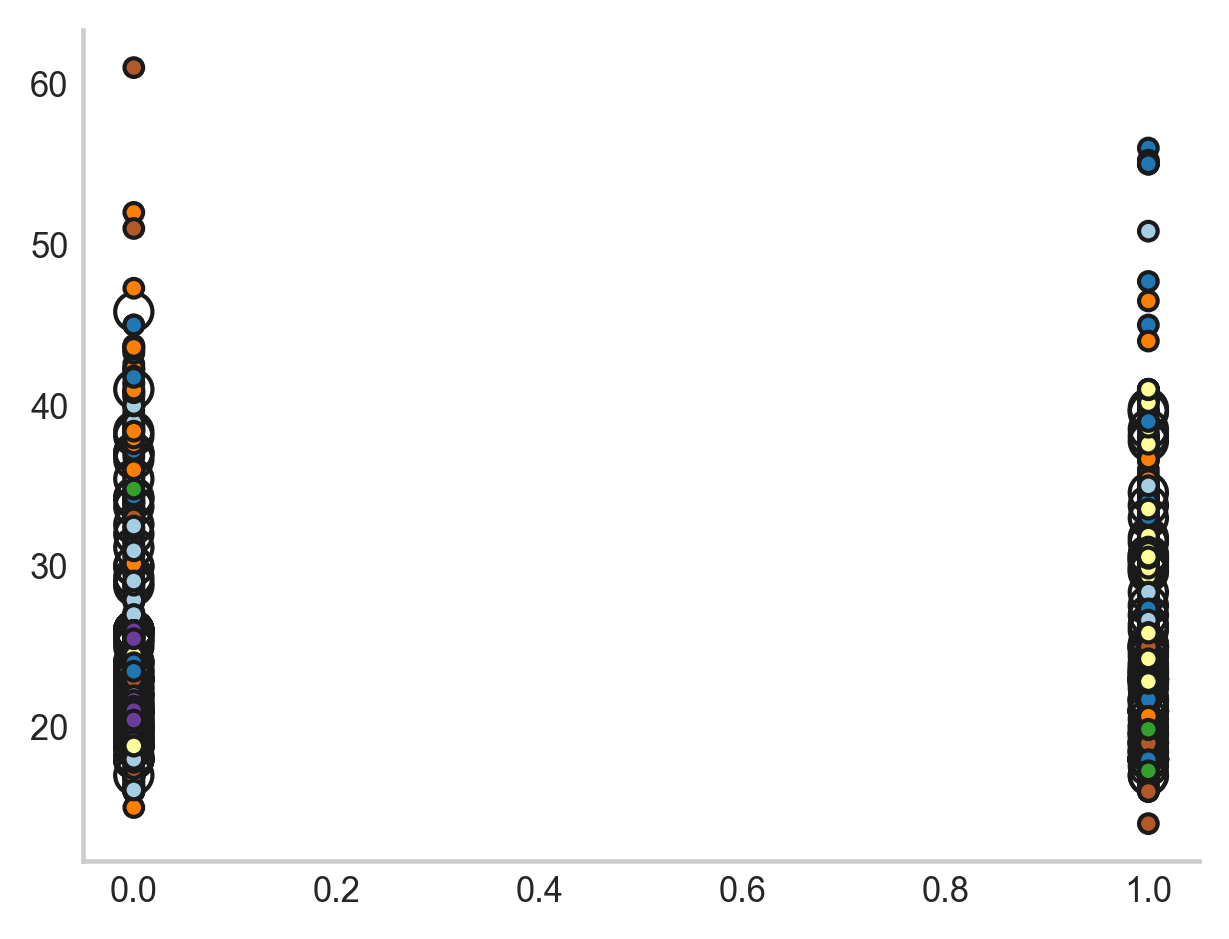

In [12]:
for kernel in ("linear", "rbf", "poly"):
    clf = SVC(
        kernel=kernel,
        gamma=10,
    )
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()

    # Scatter plot dos dados de treino
    plt.scatter(
        X_train[:, 0], 
        X_train[:, 1], 
        c=y_train, 
        zorder=10, 
        cmap=plt.cm.Paired, 
        edgecolor="k", 
        s=20
    )

    # Cálculo em volta dos dados de teste
    plt.scatter(
        X_test[:, 0], 
        X_test[:, 1], 
        facecolors="none", 
        edgecolor="k", 
        s=80
    )

    plt.axis("tight")
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading='auto')
    plt.contour(
        XX, 
        YY, 
        Z, 
        colors=["k", "k", "k"], 
        linestyles=["--", "-", "--"], 
        levels=[-0.5, 0, 0.5]
    )

    plt.title(kernel)
    plt.show()

### Parameter tunning

In [ ]:
from sklearn.datasets import make_classification
kfold = skm.KFold(5, random_state=0, shuffle=True)

# Definir a grade de parÃ¢metros para busca
grid = skm.GridSearchCV(
    SVC(
        kernel='linear', 
        gamma=10
    ), 
    {'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]},
    refit=True, 
    cv=kfold, 
    scoring='accuracy'
)


### Ajustar o modelo aos dados

In [ ]:
grid.fit(X, y)

### Exibir os melhores paâmetros

In [ ]:
ut.etiqueta_e_valor("Melhores parâmetros:", grid.best_params_)